In [22]:
import numpy as np
import h5py, math
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from Functions import *
plt.ion()

In [2]:
# fit for real pulse duration
def fit_tpulse(tlitlist):
    (mm,nn) = tlitlist.shape
    tpulse_fit_list = np.zeros(mm)
    for i in range(mm):
        tlit = tlitlist[i]
        (bincount, bins) = np.histogram(tlit,bins=50)
        tlb = bins[np.argwhere(bincount>=2)[0,0]]
        tub = bins[np.argwhere(bincount>=2)[-1,0]+1]
        tpulse_fit_list[i] = tub-tlb
    return tpulse_fit_list
# fit for non-linearity
def fit_non_linear(tlitlist):
    (mm,nn) = tlitlist.shape
    non_linearity = np.zeros(mm)
    for i in range(mm):
        tlit = tlitlist[i]
        (bincount, bins) = np.histogram(tlit,bins=50)
        tlb = bins[np.argwhere(bincount>=2)[0,0]]
        tub = bins[np.argwhere(bincount>=2)[-1,0]+1]
        tpulse = tub-tlb
        nbins = int(tpulse*10)+1
        (I_t, time) = np.histogram(tlit,bins=nbins)
        I_t = I_t/I_t.sum()
        non_linearity[i] = np.sum(I_t**2)
    return non_linearity



In [5]:
# read data to compare pixel and sub-pixel
def read_data(pulseshape,njobs,r,siglow,sighigh):
    # read from h5 files
    dirname = pulseshape+'_non-linear_N={}_{}nm/'.format(Natom,dsamp)
    fname = dirname+pulseshape+'_r={}_sig={}-{}um.h5'.format(r,siglow,sighigh)
    beamsize_list = []; contlist = []; non_linearity_list = []
    pattern_list = []; pattern_sub_list = []; tlitlist = []
    
    with h5py.File(fname,'r') as f:
        n_non_exist = 0
        for i in range(njobs):
            grpname = 'run{}/'.format(i)
            try:
                beamsize_list.append(f[grpname+'Beamsize'][()])
                contlist.append(f[grpname+'contrast'][()])
                non_linearity_list.append(f[grpname+'non_linearity'][()])
                pattern_list.append(f[grpname+'pattern'][:])
                #pattern_sub_list.append(f[grpname+'pattern_sub'][:])
                tlitlist.append(f[grpname+'tlit'][:])
            except:
                n_non_exist+=1
    print('successfully read data from {} jobs'.format(njobs-n_non_exist))
    beamsize_list = np.asarray(beamsize_list)
    contlist = np.asarray(contlist)
    non_linearity_list = np.asarray(non_linearity_list)
    pattern_list = np.asarray(pattern_list)
    #pattern_sub_list = np.asarray(pattern_sub_list)
    tlitlist = np.asarray(tlitlist)
    
    return beamsize_list, contlist, non_linearity_list, pattern_list, pattern_sub_list, tlitlist

# read data
Natom = 1000
dsamp = 10.
njobs = 500
r = 1
siglow = 0.4
sighigh = 50

(sigGaus, contGaus, nonltGaus, imgGaus, imgsubGaus, tlitGaus) = read_data('Gaussian',njobs,r,siglow,sighigh)

nonlsGaus = 1/(4*np.pi*sigGaus**2)


successfully read data from 500 jobs


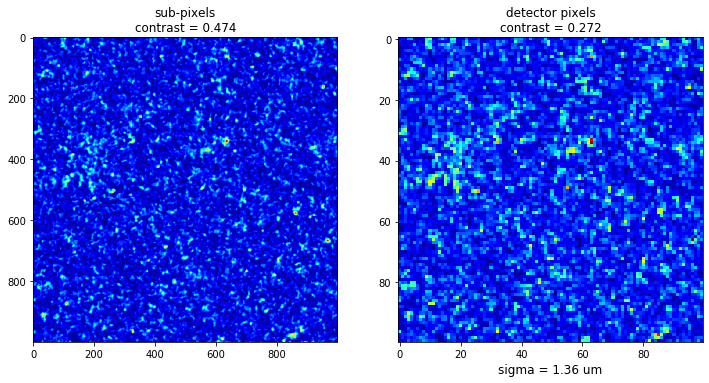

In [57]:
# compare pixel and sub-pixel
ind = np.random.choice(np.arange(contGaus.size))
#ind = 112
#ind = 76
img = imgGaus[ind]
imgsub = imgsubGaus[ind]
sig = sigGaus[ind]*1e6
nonlt = nonltGaus[ind]
nonls = nonlsGaus[ind]
cont = contGaus[ind]
contsub = (imgsub.std()/imgsub.mean())**2

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(imgsub,cmap='jet')
plt.title('sub-pixels\ncontrast = {}'.format(round(contsub,3)))

plt.subplot(1,2,2)
plt.imshow(img,cmap='jet')
plt.title('detector pixels\ncontrast = {}'.format(round(cont,3)))
plt.xlabel('sigma = {} um'.format(round(sig,2)),fontsize=12)
plt.savefig('sub-pixel_demo.png',transparent=True)

In [6]:
# read data for trend
def read_data(pulseshape,njobs,r,siglow,sighigh):
    # read from h5 files
    dirname = pulseshape+'_non-linear_N={}_{}nm/'.format(Natom,dsamp)
    fname = dirname+pulseshape+'_r={}_sig={}-{}um.h5'.format(r,siglow,sighigh)
    beamsize_list = []; contlist = []; non_linearity_list = []
    #pattern_list = []; pattern_sub_list = [];
    tlitlist = []
    
    with h5py.File(fname,'r') as f:
        n_non_exist = 0
        for i in range(njobs):
            grpname = 'run{}/'.format(i)
            try:
                beamsize_list.append(f[grpname+'Beamsize'][()])
                contlist.append(f[grpname+'contrast'][()])
                non_linearity_list.append(f[grpname+'non_linearity'][()])
                #pattern_list.append(f[grpname+'pattern'][:])
                #pattern_sub_list.append(f[grpname+'pattern_sub'][:])
                tlitlist.append(f[grpname+'tlit'][:])
            except:
                n_non_exist+=1
    print('successfully read data from {} jobs'.format(njobs-n_non_exist))
    beamsize_list = np.asarray(beamsize_list)
    contlist = np.asarray(contlist)
    non_linearity_list = np.asarray(non_linearity_list)
    #pattern_list = np.asarray(pattern_list)
    #pattern_sub_list = np.asarray(pattern_sub_list)
    tlitlist = np.asarray(tlitlist)
    
    return beamsize_list, contlist, non_linearity_list, tlitlist


In [11]:
# read data

# 5um sub-pixel
Natom = 1000
dsamp = 10.
njobs = 500
r = 1
siglow = 0.4
sighigh = 50


(sigGaus1, contGaus1, nonltGaus1, tlitGaus1) = read_data('Gaussian',njobs,r,siglow,sighigh)
nonlsGaus1 = 1/(4*np.pi*sigGaus1**2)

# 0.5um sub-pixel
Natom = 1000
dsamp = 10.
njobs = 600
r = 1
siglow = 1
sighigh = 100

(sigGaus2, contGaus2, nonltGaus2, tlitGaus2) = read_data('Gaussian',njobs,r,siglow,sighigh)
nonlsGaus2 = 1/(4*np.pi*sigGaus2**2)

successfully read data from 300 jobs
successfully read data from 500 jobs


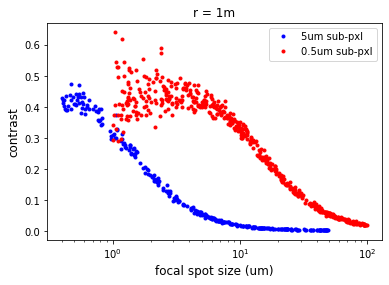

In [12]:
# plot trend
plt.figure()
plt.plot(sigGaus1*1e6,contGaus1,'b.',label='5um sub-pxl')
plt.plot(sigGaus2*1e6,contGaus2,'r.',label='0.5um sub-pxl')
ax = plt.gca()
ax.set_xscale('log')
plt.xlabel('focal spot size (um)',fontsize=12)
plt.ylabel('contrast',fontsize=12)
plt.title('r = {}m'.format(r),fontsize=12)
plt.legend()

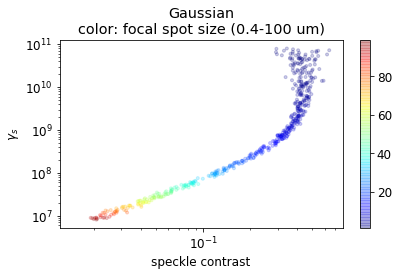

In [28]:
# Non-linearity vs contrast
plt.figure(figsize=(6,4))
plt.scatter(contGaus2,nonlsGaus2,c=sigGaus2*1e6,cmap='jet',marker='.',label='0.5um sub-pxl',alpha=0.2)
plt.title('Gaussian\ncolor: focal spot size (0.4-100 um)')
plt.xlabel('speckle contrast')
plt.ylabel(r'$\gamma_s$')
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
#plt.xlim([1e-3,1])
#plt.ylim([1e6,1e12])
plt.colorbar()
mpl.rcParams.update({'font.size': 12})
plt.tight_layout()
plt.savefig('spatial_nlinear_vs_contrast_Gaussian_log_1-100um.png',transparent=True)